# Assignment 2_wangnan_200120


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

（1） 所有节点中间的cost 必须＞=0
（2） 每次遍历所的到的list都需要排序


##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

查阅了一些材料，得出如下结论：


IDDFS 是一个状态空间（状态图）搜索策略。在这个搜索策略中，一个具有深度限制的深度优先搜索算法会不断重复地运行，并且同时放宽对于搜索深度的限制，直到找到目标状态。

个人理解：ＩＤＤＦＳ是限制了ＤＦＳ深度搜索的步长；每一次搜素的深度都不超过步长；相当于用ＢＦＳ的方式进行ＤＦＳ

这么做可以解决部分ＢＦＳ和ＤＦＳ遇到的问题
（１）DFS首先遍历通过一个相邻根的节点，然后是下一个相邻的节点。这种方法的问题是，如果有一个节点接近root，但是在DFS探索的前几个子树中没有，那么DFS很晚才到达该节点。
（２）BFS逐级进行，但需要更多空间。因为我们每次都存下了当前步能达到的所有点。

所以，IDDFS结合了深度优先搜索的空间效率和广度优先搜索的快速搜索（对于更接近根的节点）。



##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

BFS better than DFS
如果需要“优化”，并且BFS符合可优化的条件； 这种情况下，选择BFS算法 

DFS better than BFS
如果存储空间有限，对存储空间要求高，那么采用DFS会比BFS节省更多的存储空间



##### 2.4 When can we use machine learning ?

ML本质上是让程序从数据中学习规律，利用学到的规律来对真实的数据进行预测；按最终预测输出的结果的数据类型，可以分为“回归问题”和“分类问题”

（1） 回归问题
模型输出的值为“连续值”，大部分应用场景为“预测”具体的数值，未来的数据趋势。比如：房价预测，股市预测，天气数据预测.....

（2）分类问题
模型输出值为“离散值” ，应用场景为将判断数据的类别；又分为“多分类”和“二分类”

二分类： 比如员工是否会离职（“会”，“不会”） ； 这场事故的乘客是“生”还是“死”
多分类： 比如学生学情的“优，良，中，差” ； 水果经过特征分析是“苹果”，“香蕉”，还是“桔子”....

以上的场景都可以通过ML的应用，很好的解决。

##### 2.5 What is the gradient of a function ?


梯度的本质是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）

定义是：函数各个方向的偏导数构成的向量

重要结论：曲面中点的方向导数有无数个，当方向导数与梯度方向一致时，该导数值取得最大，等价于该点在梯度方向具有最快的变化值。梯度方向是函数值增加最快的方向，梯度的反方向是函数值减小最快的方向。

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

简化问题，y = f（x） 是个一元函数

          x2 = x1 + α× ∂y/∂x
α为 学习率（正数）
迭代逻辑 ： 若 x 在最大值的右侧， ∂y/∂x ＜ 0 ； x2< x1 向左移，让y值逼近最高值
            若 x 在最大值的左侧， ∂y/∂x ＞ 0 ； x2> X1 向右移，让y值逼近最高值



#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

# 实践作业思路

一.数据获取
（1）通过爬虫，爬取北京地铁官网；获得地铁线路和对应的地铁站信息，存储为 dict_1
     dict_1 结构 ： dict_1 = {线路名：{['站1'，‘站2’，‘站3’..]  }
     
（2）通过高德api接口；得到地铁站对应的经纬度坐标，存储为 dict_2    
     dict_2 结构 ： dict_2 = {'站名'：（经度，纬度) }
二.数据处理： 
通过dict_1的信息，整理出每个地铁站与之相邻的站，存储为 dict_3
     dict_3 结构 ： dict_3 = {“站1”：['相邻站2'，‘相邻站3’...‘相邻站n’] }
难点： 这里和课程中的判断条件不同；课程中是按物理距离小于700km默认相联；这里是根据实际的地铁信息的情况；找出每个站相邻的站
（1） “始发站，终点站”的处理； 始发站没有“前一站”；终点站没有“下一站”
（2） “枢纽站”（一个站在多条地铁线上）的处理：  后添加的同样key对应value值，应该是叠加关系，不是替换。

最终获得三个字典：
 dict_1 结构 ： dict_1 = {线路名：{['站1'，‘站2’，‘站3’..]  } 
 dict_2 结构 ： dict_2 = {'站名'：（经度，纬度 }
 dict_3 结构 ： dict_3 = {“站1”：['相邻站2'，‘相邻站3’...‘相邻站n’] }

三.BFS模型函数（无优化策略）：

将 dict_3 结构 ： dict_3 = {“站1”：['相邻站2'，‘相邻站3’...‘相邻站n’] } 作为输入
构建 seach函数
实现 输入：起点，终点；输出：站点路径

四.BFS模型（有优化策略）：
前两个策略，通过代码实现，亲测有效；第三个综合策略，讲一下思路；写一下“伪代码”
策略一： 距离最短（站与站之间的物理距离累加和最小）
通过dict_2的经纬度信息，计算出站与站之间的距离；每次输出前，按距离升序排序；输出距离最小的路径； 

策略二： 换成最少（起点到终点经过的站数最少）
（1）在pathes表中，过滤出["起点，,,,,,终点']的候选子list ； 添加到一个新的备选表
（2）遍历备选表，计算每个候选list的长度  len（）
（3）对备选表按 len的升序排列，输出第一个list （长度最短，即换成站数最少的路径）

策略三 ；综合考虑 （距离最短+换乘最少）

场景分析： 假设每台地铁的速度是恒定的；那么距离最短的策略一，本质上就是“最快路径” ；而策略二本质上是节省了用户换成的次数，提升了出行体验
策略三将二者综合是为了调和“效率”和“体验”存在的矛盾；生成的折中方案。

实现思路一 
每一条路径取：同时取两个变量：变量1=路径长度； 变量2=换成站数
step1：构建公式： 综合评分 = 1/（a×路径的长度 + b × 路径的站数）  
                a 和 b 为权重系数 ，根据具体业务场景调节      
step2：遍历所有可以从“起点”到达“重点”的路径； 计算每条路径的综合评分，按综合评分降序排列，输出 评分最高的

实现思路二
通过逻辑判断：
分别跑策略一，策略二；得到： 路径1（最快路径） 路径2（最少换乘），执行以下判断

【判断1】 路径1 和 路径2 是否相同 ？
          相同： output  路径1 = 路径2 
          不相同 ： 【判断2】 是否存在路径3 （长度小于路径2，大于路径1 and 换乘站小于路径1，大于路径2 ）？
                     不存在 ： output 路径1 or 路径2 （到底输出哪个，可根据业务需求定策略）
                     存在： 【判断3】 路径3是否唯一 ？
                             唯一： 只有一个路径3 output ： 路径3
                             不唯一： 将符合条件的路径3们，按 最快路径 or 最小换成 为条件(具体按哪个规则，根据业务需求定策略) 
                                     、output： 排序后的第一个结果；
                             
                        

# 数据获取 - 爬虫得到 dict_1 

In [1]:
import requests
from bs4 import BeautifulSoup 
import json
import xlwt
import pandas as pd
import bs4
import re

In [2]:
url= 'https://www.bjsubway.com/station/xltcx/'   # 北京地铁官网

In [3]:
# 伪装头，简单做一下反爬
headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0'                                        
        }

In [4]:
r = requests.get(url,verify=False,headers=headers) 
r.encoding = 'gb18030' 

E:\aconda\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [5]:
soup = BeautifulSoup(r.text,'lxml',fromEncoding="gbk") 
subway_name = soup.find_all('div',"line_content")
subway_line = soup.find_all('div',"line_name")
subway_station =soup.find_all('div','station')

E:\aconda\lib\site-packages\bs4\__init__.py:164: UserWarning: The "fromEncoding" argument to the BeautifulSoup constructor has been renamed to "from_encoding."
  'has been renamed to "%s."' % (old_name, new_name))
E:\aconda\lib\site-packages\bs4\__init__.py:177: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [6]:
dict_1={}
for i in subway_name:
    key = str(i)
    pat1 = '">(.*?)<'
    key_list=re.compile(pat1).findall(key)  
    key_list_filter = list(filter(None,key_list)) #过滤空字符串

 这里要吐槽一下北京地铁官网的开发工程师了； 线路和站点写成了平级关系，只能放到一个表里；造成了很大的麻烦！
 我没有想到什么好办法，把线和站在一个表格里区分出来，做出正确的线路和站点的对应关系；所以只能人工数数了.....下面的代码很low，但至少可以获得正确干净的数据。

In [7]:
list1=[]    
for j in key_list_filter[1:24] :
    list1.append(j)
    dict_1[key_list_filter[0]]=list1
list2=[]    
for j in key_list_filter[25:42] :
    list2.append(j)
    dict_1[key_list_filter[24]]=list2
list4=[]    
for j in key_list_filter[45:68] :
    list4.append(j)
    dict_1[key_list_filter[43]]=list4   
list5=[]    
for j in key_list_filter[70:92] :
    list5.append(j)
    dict_1[key_list_filter[69]]=list5
list6=[]    
for j in key_list_filter[94:127] :
    list6.append(j)
    dict_1[key_list_filter[93]]=list6 
list7=[]    
for j in key_list_filter[129:157] :
    list7.append(j)
    dict_1[key_list_filter[128]]=list7
list8=[]    
for j in key_list_filter[159:190] :
    list8.append(j)
    dict_1[key_list_filter[158]]=list8
list9=[] 
for j in key_list_filter[192:204] :
    list9.append(j)
    dict_1[key_list_filter[191]]=list9 
list10=[] 
for j in key_list_filter[206:250] :
    list10.append(j)
    dict_1[key_list_filter[205]]=list10
list13=[] 
for j in key_list_filter[252:268] :
    list13.append(j)
    dict_1[key_list_filter[251]]=list13
list14=[] 
for j in key_list_filter[271:300] :
    list14.append(j)
    dict_1[key_list_filter[269]]=list14
list15=[] 
for j in key_list_filter[302:321] :
    list15.append(j)
    dict_1[key_list_filter[301]]=list15         
list16=[] 
for j in key_list_filter[324:333] :
    list16.append(j)
    dict_1[key_list_filter[322]]=list16
list_batong=[]
for j in key_list_filter[335:348] :
    list_batong.append(j)
    dict_1[key_list_filter[334]]=list_batong
list_changping=[]
for j in key_list_filter[350:361] :
    list_changping.append(j)
    dict_1[key_list_filter[349]]=list_changping    
list_yizhuang=[]
for j in key_list_filter[363:376] :
    list_yizhuang.append(j)
    dict_1[key_list_filter[362]]=list_yizhuang
list_fangshan=[]
for j in key_list_filter[378:388] :
    list_fangshan.append(j)
    dict_1[key_list_filter[377]]=list_fangshan
list_jichang=[]
for j in key_list_filter[390:393] :
    list_jichang.append(j)
    dict_1[key_list_filter[389]]=list_jichang
list_daxing=[]
for j in key_list_filter[396:407] :
    list_daxing.append(j)
    dict_1[key_list_filter[394]]=list_daxing
list_s1=[]
for j in key_list_filter[410:416] :
    list_s1.append(j)
    dict_1[key_list_filter[408]]=list_s1

In [8]:
dict_1          #输出字典1

{'1号线': ['苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',
  '万寿路',
  '公主坟',
  '军事博物馆',
  '木樨地',
  '南礼士路',
  '复兴门',
  '西单',
  '天安门西',
  '天安门东',
  '王府井',
  '东单',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '四惠',
  '四惠东'],
 '2号线': ['西直门',
  '积水潭',
  '鼓楼大街',
  '安定门',
  '雍和宫',
  '东直门',
  '东四十条',
  '朝阳门',
  '建国门',
  '北京站',
  '崇文门',
  '前门',
  '和平门',
  '宣武门',
  '长椿街',
  '复兴门',
  '阜成门'],
 '4号线': ['安河桥北',
  '北宫门',
  '西苑',
  '圆明园',
  '北京大学东门',
  '中关村',
  '海淀黄庄',
  '人民大学',
  '魏公村',
  '国家图书馆',
  '动物园',
  '西直门',
  '新街口',
  '平安里',
  '西四',
  '灵境胡同',
  '西单',
  '宣武门',
  '菜市口',
  '陶然亭',
  '北京南站',
  '马家堡',
  '角门西'],
 '5号线': ['宋家庄',
  '刘家窑',
  '蒲黄榆',
  '天坛东门',
  '磁器口',
  '崇文门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '和平里北街',
  '和平西桥',
  '惠新西街南口',
  '惠新西街北口',
  '大屯路东',
  '北苑路北',
  '立水桥南',
  '立水桥',
  '天通苑南',
  '天通苑'],
 '6号线': ['金安桥',
  '苹果园',
  '杨庄',
  '西黄村',
  '廖公庄',
  '田村',
  '海淀五路居',
  '慈寿寺',
  '花园桥',
  '白石桥南',
  '车公庄西',
  '车公庄',
  '平安里',
  '北海北',
  '南锣鼓巷',
  '东四',
  '朝阳门',
  '东大桥',
  '呼家楼',


# 数据获取 - 高德 api 得到 dict_2 

In [9]:
import requests
import json

In [10]:
address_list=[]    #获取所有站点
for i in dict_1:
    for j in dict_1[i]:
        address_list.append(j)
print(address_list)

['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东', '西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '金安桥', '苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '广渠门内', '广渠门外', '双井', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '垡头', '双合', '焦化厂'

In [11]:
dict_2={}
long_list=[]
lat_list=[]
for station in address_list:
    url = 'https://restapi.amap.com/v3/geocode/geo?key=25a00f71095bd43e8e2f67b960d910a4&address='+str(station)+'&city=北京'   # 输入API问号前固定不变的部分
             # 将两个参数放入字典
    res = requests.get(url)
    
    content = res.json()
    lot=(content['geocodes'])
    if lot == []: continue
    values = (content['geocodes'][0]['location'])
    #print(values)
    values_split = values.split(',')
    #print(values_split)
    long=float(values_split[0])
    long_list.append(long)
    lat=float(values_split[1])
    lat_list.append(lat)
    long_lat_list = list(map(lambda x,y:(x,y) ,long_list,lat_list))
    
    for i in range(len(long_lat_list)):        
        dict_2[station]=long_lat_list[i]

In [12]:
dict_2

{'苹果园': (116.179364, 39.926582),
 '古城': (116.188462, 39.911362),
 '八角游乐园': (116.208596, 39.912045),
 '八宝山': (116.236669, 39.907681),
 '玉泉路': (116.252419, 39.900692),
 '五棵松': (116.276703, 39.908738),
 '万寿路': (116.295846, 39.90131),
 '公主坟': (116.187855, 39.804608),
 '军事博物馆': (116.316876, 39.902067),
 '木樨地': (116.333916, 39.90846),
 '南礼士路': (116.352891, 39.922123),
 '复兴门': (116.35318, 39.906006),
 '西单': (116.374072, 39.907383),
 '天安门西': (116.397477, 39.908692),
 '天安门东': (116.397477, 39.908692),
 '王府井': (116.412422, 39.908966),
 '东单': (116.419375, 39.909821),
 '建国门': (116.435979, 39.908117),
 '永安里': (116.232361, 40.211305),
 '大望路': (116.48057, 39.910341),
 '四惠': (116.49567, 39.91029),
 '四惠东': (116.507591, 39.930566),
 '西直门': (116.355423, 39.940475),
 '积水潭': (116.372779, 39.948033),
 '鼓楼大街': (116.267663, 40.18446),
 '安定门': (116.410777, 39.952308),
 '雍和宫': (116.417795, 39.945371),
 '东直门': (116.441822, 39.930855),
 '东四十条': (116.429276, 39.933874),
 '朝阳门': (116.432826, 39.923483),
 '北京站': (116

# 数据处理 - 利用dict_1 得到 dict_3 

dict_3 结构 ： dict_3 = {“站1”：['相邻站2'，‘相邻站3’...‘相邻站n’] }
难点： 这里和课程中的判断条件不同；课程中是按物理距离小于700km默认相联；这里是根据实际的地铁信息的情况；找出每个站相邻的站
（1） “始发站，终点站”的处理； 始发站没有“前一站”；终点站没有“下一站”
（2） “枢纽站”（一个站在多条地铁线上）的处理：  后添加的同样key对应value值，应该是叠加关系，不是替换。

In [13]:
def neighbor_station(test_dict1):
    connect_dict = {}
    test_dict2={}
    for i in test_dict1:    
        for j,k in enumerate(test_dict1[i]):                
            if j == 0:             #如果是起点站，没有前一站
                pre_stop = 'null'
                next_stop = test_dict1[str(i)][j+1]
            elif j < len(test_dict1[i])-1: 
                pre_stop =  test_dict1[str(i)][j-1]
                next_stop = test_dict1[str(i)][j+1]
            else:                  #如果是终点站，没有下一站
                pre_stop = test_dict1[str(i)][j-1]
                next_stop = 'null'
        
            a = test_dict1[str(i)][j]
            if a not in test_dict2 :           #如果没有重合的站，将新站添加到相邻站字典
                connect_dict[a]=[pre_stop,next_stop]
                test_dict2[a]=connect_dict[a]
            else:                               #如果有重合的站，key值不变的前提下value值叠加
                connect_dict[a] =  connect_dict[a] + [pre_stop,next_stop]
            
            for m in connect_dict:
                    for n in connect_dict[m]:
                        if 'null' in connect_dict[m]:
                            connect_dict[m].remove('null')

                            
                           
    return connect_dict        
#print(connect_dict)
    

In [14]:
dict_3 = neighbor_station(dict_1)


In [15]:
dict_3

{'苹果园': ['古城', '金安桥', '杨庄'],
 '古城': ['苹果园', '八角游乐园'],
 '八角游乐园': ['古城', '八宝山'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['八宝山', '五棵松'],
 '五棵松': ['玉泉路', '万寿路'],
 '万寿路': ['五棵松', '公主坟'],
 '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
 '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
 '木樨地': ['军事博物馆', '南礼士路'],
 '南礼士路': ['木樨地', '复兴门'],
 '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
 '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
 '天安门西': ['西单', '天安门东'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['天安门东', '东单'],
 '东单': ['王府井', '建国门', '崇文门', '灯市口'],
 '建国门': ['东单', '永安里', '朝阳门', '北京站'],
 '永安里': ['建国门', '国贸'],
 '国贸': ['永安里', '大望路', '金台夕照', '双井'],
 '大望路': ['国贸', '四惠', '九龙山', '朝阳公园'],
 '四惠': ['大望路', '四惠东', '四惠东'],
 '四惠东': ['四惠', '四惠', '高碑店'],
 '西直门': ['积水潭', '动物园', '新街口', '大钟寺'],
 '积水潭': ['西直门', '鼓楼大街'],
 '鼓楼大街': ['积水潭', '安定门', '安德里北街', '什刹海'],
 '安定门': ['鼓楼大街', '雍和宫'],
 '雍和宫': ['安定门', '东直门', '北新桥', '和平里北街'],
 '东直门': ['雍和宫', '东四十条', '三元桥'],
 '东四十条': ['东直门', '朝阳门'],
 '朝阳门': ['东四十条', '建国门', '东四', '东大桥'],
 '北京站': ['建国门', '崇文门'],
 '崇文门': ['北京站', '前门

# BFS模型函数（无优化策略）

注意：这里没有加优化策略；同时默认找到第一个终点站；第一条路径，就输出为结果；

In [16]:
def search_1(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [17]:
search_1(dict_3,"北京站","西单")

['北京站', '崇文门', '前门', '和平门', '宣武门', '西单']

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

# BFS模型函数（op：优化策略一：距离最短）

策略一： 距离最短（站与站之间的物理距离累加和最小）
通过dict_2的经纬度信息，计算出站与站之间的距离；每次输出前，按距离升序排序；输出距离最小的路径； 

计算站与站之间的距离

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
#这里补充一些，高德未识别出的站点经纬度

dict_2['国贸']=(116.46, 39.9084)
dict_2['前门']=(116.398, 39.9002)    
dict_2['西苑']=(116.291, 39.9983)
dict_2['西四']=(116.37299999999999, 39.9242)
dict_2['东四']=(116.417, 39.9244)
dict_2['北海北']=(116.387, 39.9333)
dict_2['草房']=(116.615, 39.9244) 
dict_2['通运门']=(116.677, 39.91)
dict_2['化工']=(116.507, 39.8893)
dict_2['南楼梓庄']=(116.501, 39.8748)
dict_2['北苑']=(116.435, 40.043)
dict_2['枣营']=(116.47399999999999, 39.9443)
dict_2['阜通']=(116.47, 39.9927)
dict_2['国展']=(116.555, 40.0701)
dict_2['新宫']=(116.366, 39.8123)
dict_2['万盛东']=(116.366, 39.8123)
dict_2['群芳']=(116.677326,39.869546)
dict_2['万盛西']=(116.638987,39.86981)
dict_2['景泰']=(116.417164,39.871443)
dict_2['和义']=(116.408491,39.821387)
dict_2['火箭万源']=(116.425132,39.805405)
dict_2['德茂']=(116.448258,39.778312)
dict_2['泥洼']=(116.310813,39.8647)
dict_2['屯佃']=(116.222442,40.074106)
dict_2['小园']=(116.121001,39.896156)
dict_2['上岸']=(116.128714,39.911139)



In [24]:
cities_connection_graph = nx.Graph(dict_3)

In [25]:
print(cities_connection_graph)

E:\aconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


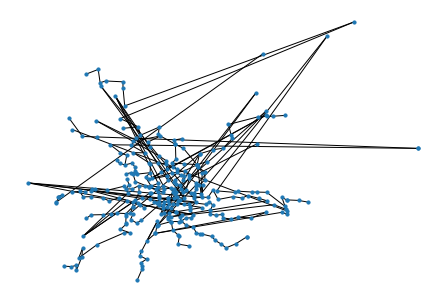

In [22]:
nx.draw(cities_connection_graph,dict_2, with_labels=False,node_size=10)

注意： 图片上个别点链接并不理想； 分析原因是因为，高德api对应的地址可能高德并没有判断出地址是地铁站；导致部分站点输出的经纬度坐标不对

### (Optional) Improve your agent to make it able to find a path based on different strategies

策略一 ： 从起点到终点，途径的站与站之间的距离和是最小的

计算站与站之间的物理距离，复用代码

In [26]:
import math

def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
#折算地球是球体；做了换算 

In [27]:
dict_2

{'苹果园': (116.179364, 39.926582),
 '古城': (116.188462, 39.911362),
 '八角游乐园': (116.208596, 39.912045),
 '八宝山': (116.236669, 39.907681),
 '玉泉路': (116.252419, 39.900692),
 '五棵松': (116.276703, 39.908738),
 '万寿路': (116.295846, 39.90131),
 '公主坟': (116.187855, 39.804608),
 '军事博物馆': (116.316876, 39.902067),
 '木樨地': (116.333916, 39.90846),
 '南礼士路': (116.352891, 39.922123),
 '复兴门': (116.35318, 39.906006),
 '西单': (116.374072, 39.907383),
 '天安门西': (116.397477, 39.908692),
 '天安门东': (116.397477, 39.908692),
 '王府井': (116.412422, 39.908966),
 '东单': (116.419375, 39.909821),
 '建国门': (116.435979, 39.908117),
 '永安里': (116.232361, 40.211305),
 '大望路': (116.48057, 39.910341),
 '四惠': (116.49567, 39.91029),
 '四惠东': (116.507591, 39.930566),
 '西直门': (116.355423, 39.940475),
 '积水潭': (116.372779, 39.948033),
 '鼓楼大街': (116.267663, 40.18446),
 '安定门': (116.410777, 39.952308),
 '雍和宫': (116.417795, 39.945371),
 '东直门': (116.441822, 39.930855),
 '东四十条': (116.429276, 39.933874),
 '朝阳门': (116.432826, 39.923483),
 '北京站': (116

In [28]:
def get_city_distance(city1,city2):
    return geo_distance(dict_2[city1],dict_2[city2])

get_city_distance("北京站","西单")

5.713331350233207

BFS代码+策略一

In [29]:
def search_2(graph,start,destination,search_strategy):         #输入：路径字典，起点，终点，检索策略
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！            
        if froniter == destination:# ！
            return path# ！        
        successsors = graph[froniter]        
        for city in successsors:
            if city in path: continue  # check loop            
            new_path = path+[city]            
            pathes.append(new_path)  #bfs            
        pathes = search_strategy(pathes,destination)           #输出 pathes  对pathes 上匹配策略
        #rint(pathes)
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  

策略一代码

In [30]:
def search_2(graph,start,destination,search_strategy):         #输入：路径字典，起点，终点，检索策略
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！            
        if froniter == destination:# ！
            return path# ！        
        successsors = graph[froniter]        
        for city in successsors:
            if city in path: continue  # check loop            
            new_path = path+[city]            
            pathes.append(new_path)  #bfs            
        pathes = search_strategy(pathes)           #输出 pathes  对pathes 上匹配策略
        #rint(pathes)
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  

In [31]:
def sort_by_distance(pathes):                    #输入 pathes
    #print(pathes)
    def get_distance_of_path(path):              #输入 path ；path是pathes里面的第一个子list
        #print(path)
        distance = 0
        for i,_ in enumerate(path[:-1]):        # i= 是0：n-1  
            distance += get_city_distance(path[i],path[i+1])   #dis[0,1]+dis[1,2]+dis[2,3]+... dis[ n-1+ n ]
        return distance
    return sorted(pathes,key=get_distance_of_path)      #对 pathes中的元素排序；按着距离的顺序，递增

In [32]:
search_2(dict_3,"北京站","西单",search_strategy=sort_by_distance)

['北京站', '崇文门', '东单', '王府井', '天安门东', '天安门西', '西单']

# BFS模型函数（op：优化策略二：换乘最少）

In [33]:
list_test = [[1,2,3,4,5,6,7],[1],[1,2,3],[3,4,5,6],[1,2,3,4,5]]
#排序语法
def selection_sort(list_test):
    length = len(list_test)
    for i in range(length - 1, 0, -1):
        for j in range(i):
            if len(list_test[j]) > len(list_test[i]):
                list_test[j], list_test[i] = list_test[i], list_test[j]
    return list_test[0]
    


In [34]:
selection_sort(list_test)

[1]

In [35]:
def search_3(graph,start,destination,search_strategy):         #输入：路径字典，起点，终点，检索策略
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！            
        if froniter == destination:# ！
            return path# ！        
        successsors = graph[froniter]        
        for city in successsors:
            if city in path: continue  # check loop            
            new_path = path+[city]            
            pathes.append(new_path)  #bfs            
        pathes = search_strategy(pathes,destination)           #输出 pathes  对pathes 上匹配策略
        #rint(pathes)
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  

In [36]:
def sort_by_transfers(pathes,destination):                    #输入 pathes，终点
    list_transfers=[]
    for i in pathes:
        if i[-1] == destination :
            list_transfers.append(i)
            #print(list_transfers)         
            list_min=selection_sort(list_transfers)
            #print(selection_sort(list_transfers))
        
        
    return pathes  #sorted(pathes,key=get_distance_of_path)      #对 pathes中的元素排序；按着距离的顺序，递增

In [37]:
search_3(dict_3,"北京站","西单",search_strategy=sort_by_transfers)

['北京站', '崇文门', '前门', '和平门', '宣武门', '西单']

结果对比： 策略二 比 策略一 更少换乘

In [38]:
#距离最短
search_2(dict_3,"北京站","西单",search_strategy=sort_by_distance)

['北京站', '崇文门', '东单', '王府井', '天安门东', '天安门西', '西单']

In [39]:
#换成最少
search_3(dict_3,"北京站","西单",search_strategy=sort_by_transfers)

['北京站', '崇文门', '前门', '和平门', '宣武门', '西单']

# 策略三 ： 综合策略（写一下思路，没写代码）

实现思路一 
每一条路径取：同时取两个变量：变量1=路径长度； 变量2=换成站数
step1：构建公式： 综合评分 = 1/（a×路径的长度 + b × 路径的站数）  
                a 和 b 为权重系数 ，根据具体业务场景调节      
step2：遍历所有可以从“起点”到达“重点”的路径； 计算每条路径的综合评分，按综合评分降序排列，输出 评分最高的

实现思路二
通过逻辑判断：
分别跑策略一，策略二；得到： 路径1（最快路径） 路径2（最少换乘），执行以下判断

【判断1】 路径1 和 路径2 是否相同 ？
          相同： output  路径1 = 路径2 
          不相同 ： 【判断2】 是否存在路径3 （长度小于路径2，大于路径1 and 换乘站小于路径1，大于路径2 ）？
                     不存在 ： output 路径1 or 路径2 （到底输出哪个，可根据业务需求定策略）
                     存在： 【判断3】 路径3是否唯一 ？
                             唯一： 只有一个路径3 output ： 路径3
                             不唯一： 将符合条件的路径3们，按 最快路径 or 最小换成 为条件(具体按哪个规则，根据业务需求定策略) 
                             output： 排序后的第一个结果；

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 